In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import random





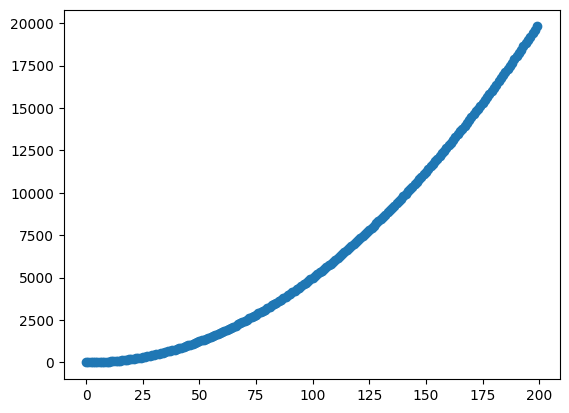

In [2]:

x = np.arange(200)

y = x * (x+1)/2
plt.scatter(x ,y)
plt.show()


In [3]:
#Normalization The  Dataset
mn = x.min()
mx =x.max()
x = (x - mn)/(mx - mn)
mn = y.min()
mx =y.max()
y = (y - mn)/(mx - mn)




In [4]:
def gradientDescent(x , y , lr,it):
    m = 0.0
    c = 0.0
    Dm = 0.0
    Dc = 0.0
    n = len(x)
    for _ in range(it):
        Dm = 0
        Dc = 0
        for i in range(len(x)):
            Dm += -2*x[i]*(y[i] - (m*x[i]+c))
            Dc += -2*(y[i] - (m*x[i]+c))
        m = m - lr * Dm / n
        c = c - lr * Dc / n
    return m , c

In [5]:
def MSE(y_pred,y_true):
    sum = 0.0
    n = len(y_true)
    for i,j in zip(y_pred,y_true): sum += (i - j)**2
    return sum/n

In [6]:
#main
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

m , c = gradientDescent(X_train,y_train,0.001,10000)

ypred = m * X_test + c
mse = MSE(ypred,y_test)
print("MSE:",mse)


MSE: 0.0052446118666656


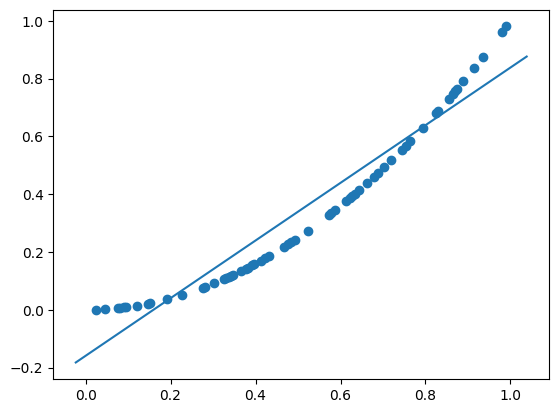

In [7]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

plt.scatter(X_test ,y_test)
abline(m,c)
plt.show()